✓ Libraries imported successfully!
  pandas version: 2.2.2
  numpy version: 2.0.2
  matplotlib version: 3.10.0

✓ 18 cardiometabolic pathways defined

KEGG PATHWAY ENRICHMENT DOT PLOT

📁 Please upload your g:Profiler intersection CSV files:
  1. GSE20950_PC_gProfiler_*_intersections.csv
  2. GSE43292_PC_gProfiler_*_intersections.csv


Saving GSE20950_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-53-20__intersections.csv to GSE20950_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-53-20__intersections.csv
Saving GSE43292_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-52-41__intersections.csv to GSE43292_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-52-41__intersections.csv

✓ Files identified:
  GSE20950: GSE20950_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-53-20__intersections.csv
  GSE43292: GSE43292_PC_gProfiler_hsapiens_2026. 1. 23. 오후 1-52-41__intersections.csv

📊 Loading g:Profiler results...
  GSE20950: 58 pathways loaded
  GSE43292: 12 pathways loaded

🔍 Filtering for cardiometabolic pathways...

  GSE20950: 9 cardiometabolic pathways
  GSE43292: 6 cardiometabolic pathways
  Total: 15 entries

✓ Cardiometabolic pathways found:
  - AGE-RAGE signaling pathway in diabetic complications
  - Adrenergic signaling in cardiomyocytes
  - Apelin signaling pathway
  - Cytosolic DNA-sensing pathway
  - Efferocytosis
  - Fluid shear stress a

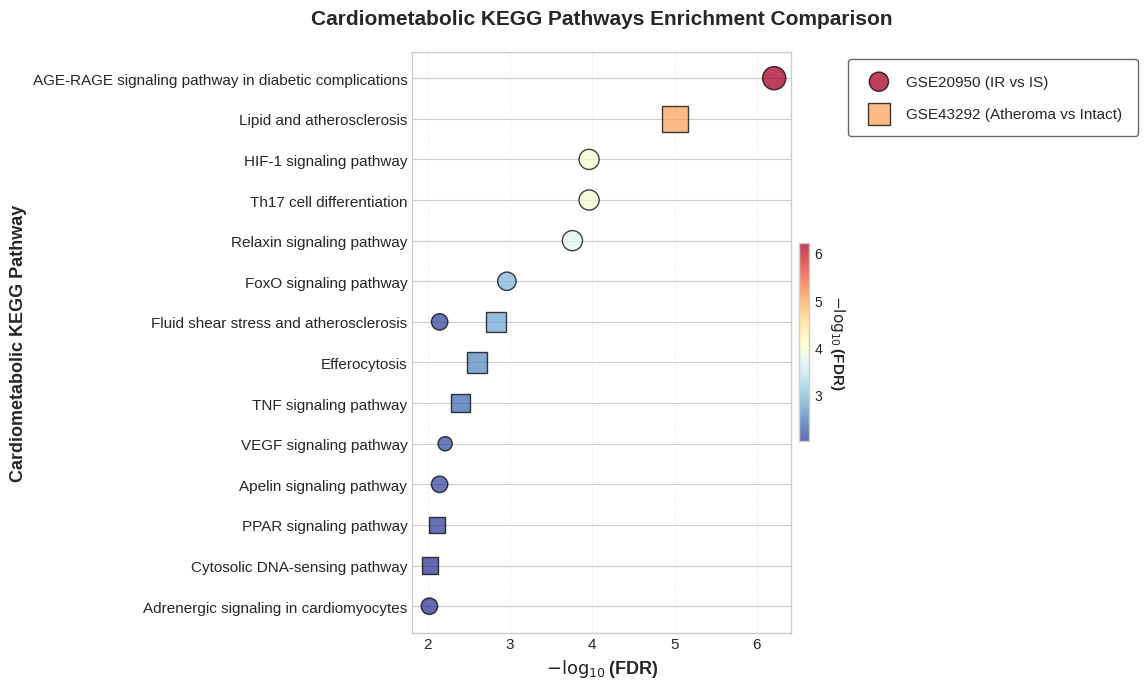

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download started

SUMMARY STATISTICS

📊 Dataset-specific pathway counts:
  GSE20950: 9 pathways
  GSE43292: 6 pathways

🔄 Pathway overlap:
  Common pathways: 1
  GSE20950 only: 8
  GSE43292 only: 5

✓ Pathways enriched in both datasets:
  - Fluid shear stress and atherosclerosis
    GSE20950: 2.14, GSE43292: 2.83

ANALYSIS COMPLETE


In [1]:
"""
KEGG Pathway Enrichment Dot Plot Visualization
===============================================

This notebook creates publication-ready dot plots comparing KEGG pathway enrichment
between two datasets (GSE20950 and GSE43292) based on g:Profiler analysis results.

Input: g:Profiler intersection CSV files
Output: High-resolution dot plot (300 DPI)

Author: Noden
Date: 2025-01-26
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Google Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Set matplotlib style
plt.style.use("seaborn-v0_8-whitegrid")

print("✓ Libraries imported successfully!")
print(f"  pandas version: {pd.__version__}")
print(f"  numpy version: {np.__version__}")
print(f"  matplotlib version: {plt.matplotlib.__version__}")

# ============================================================================
# Configuration: Cardiometabolic KEGG Pathways
# ============================================================================

# Define cardiometabolic-relevant KEGG pathways
CARDIOMETABOLIC_PATHWAYS = [
    # 1. Inflammation & Immune Response
    "TNF signaling pathway",
    "IL-17 signaling pathway",
    "Th17 cell differentiation",
    "Toll-like receptor signaling pathway",
    "NOD-like receptor signaling pathway",
    "Cytosolic DNA-sensing pathway",
    "HIF-1 signaling pathway",

    # 2. Metabolic Dysfunction
    "AGE-RAGE signaling pathway in diabetic complications",
    "PPAR signaling pathway",
    "Insulin resistance",
    "FoxO signaling pathway",
    "Apelin signaling pathway",

    # 3. Vascular Pathology & Atherosclerosis
    "Lipid and atherosclerosis",
    "Fluid shear stress and atherosclerosis",
    "Relaxin signaling pathway",
    "VEGF signaling pathway",
    "Adrenergic signaling in cardiomyocytes",
    "Efferocytosis"
]

print(f"\n✓ {len(CARDIOMETABOLIC_PATHWAYS)} cardiometabolic pathways defined")

# ============================================================================
# Step 1: File Upload
# ============================================================================

print("\n" + "="*80)
print("KEGG PATHWAY ENRICHMENT DOT PLOT")
print("="*80)

if IN_COLAB:
    print("\n📁 Please upload your g:Profiler intersection CSV files:")
    print("  1. GSE20950_PC_gProfiler_*_intersections.csv")
    print("  2. GSE43292_PC_gProfiler_*_intersections.csv")
    uploaded = files.upload()
    csv_files = list(uploaded.keys())

    # Identify files by dataset name
    gse20950_file = [f for f in csv_files if "20950" in f][0]
    gse43292_file = [f for f in csv_files if "43292" in f][0]

    print(f"\n✓ Files identified:")
    print(f"  GSE20950: {gse20950_file}")
    print(f"  GSE43292: {gse43292_file}")
else:
    # For local execution
    gse20950_file = "GSE20950_PC_gProfiler_intersections.csv"
    gse43292_file = "GSE43292_PC_gProfiler_intersections.csv"
    print(f"\nUsing local files:")
    print(f"  {gse20950_file}")
    print(f"  {gse43292_file}")

# ============================================================================
# Step 2: Load and Process Data
# ============================================================================

print("\n📊 Loading g:Profiler results...")

# Load CSV files
df_gse20950 = pd.read_csv(gse20950_file)
df_gse43292 = pd.read_csv(gse43292_file)

print(f"  GSE20950: {len(df_gse20950)} pathways loaded")
print(f"  GSE43292: {len(df_gse43292)} pathways loaded")

# Select required columns
required_cols = [
    "term_name",
    "intersection_size",
    "adjusted_p_value",
    "negative_log10_of_adjusted_p_value"
]

df_gse20950 = df_gse20950[required_cols].copy()
df_gse43292 = df_gse43292[required_cols].copy()

# ============================================================================
# Step 3: Filter for Cardiometabolic Pathways
# ============================================================================

print("\n🔍 Filtering for cardiometabolic pathways...")

# Filter for cardiometabolic pathways only
df_gse20950_cm = df_gse20950[
    df_gse20950["term_name"].isin(CARDIOMETABOLIC_PATHWAYS)
].copy()

df_gse43292_cm = df_gse43292[
    df_gse43292["term_name"].isin(CARDIOMETABOLIC_PATHWAYS)
].copy()

# Add dataset labels
df_gse20950_cm["Dataset"] = "GSE20950 (IR vs IS)"
df_gse43292_cm["Dataset"] = "GSE43292 (Atheroma vs Intact)"

# Combine datasets
combined = pd.concat([df_gse20950_cm, df_gse43292_cm], ignore_index=True)

print(f"\n  GSE20950: {len(df_gse20950_cm)} cardiometabolic pathways")
print(f"  GSE43292: {len(df_gse43292_cm)} cardiometabolic pathways")
print(f"  Total: {len(combined)} entries")

if combined.empty:
    raise ValueError("No cardiometabolic pathways found in the data!")

# Print identified pathways
print("\n✓ Cardiometabolic pathways found:")
for term in sorted(combined["term_name"].unique()):
    print(f"  - {term}")

# ============================================================================
# Step 4: Order Pathways by Maximum -log10(FDR)
# ============================================================================

print("\n📊 Ordering pathways by maximum enrichment score...")

# Calculate maximum -log10(FDR) for each pathway across both datasets
pathway_max_scores = (
    combined.groupby("term_name")["negative_log10_of_adjusted_p_value"]
    .max()
    .sort_values(ascending=False)
)

pathway_order = pathway_max_scores.index.tolist()

print("\n=== Pathway Ranking (by max -log10(FDR)) ===")
for i, (term, max_score) in enumerate(pathway_max_scores.items(), 1):
    datasets_info = []

    # Get score from GSE20950 if present
    if term in set(df_gse20950_cm["term_name"]):
        score_20950 = df_gse20950_cm[
            df_gse20950_cm["term_name"] == term
        ]["negative_log10_of_adjusted_p_value"].values[0]
        datasets_info.append(f"GSE20950: {score_20950:.2f}")

    # Get score from GSE43292 if present
    if term in set(df_gse43292_cm["term_name"]):
        score_43292 = df_gse43292_cm[
            df_gse43292_cm["term_name"] == term
        ]["negative_log10_of_adjusted_p_value"].values[0]
        datasets_info.append(f"GSE43292: {score_43292:.2f}")

    print(f"{i}. MAX={max_score:.2f} | {' & '.join(datasets_info)} | {term}")

# Set pathway order as categorical for proper sorting
combined["term_name"] = pd.Categorical(
    combined["term_name"],
    categories=pathway_order,
    ordered=True
)

# ============================================================================
# Step 5: Create Dot Plot
# ============================================================================

print("\n📊 Creating dot plot...")

# Calculate figure height based on number of pathways
fig_height = max(7, len(pathway_order) * 0.5)
fig, ax = plt.subplots(figsize=(12, fig_height))

# Define markers for each dataset
markers = {
    "GSE20950 (IR vs IS)": "o",           # Circle
    "GSE43292 (Atheroma vs Intact)": "s"  # Square
}

# Get color scale range
vmin = combined["negative_log10_of_adjusted_p_value"].min()
vmax = combined["negative_log10_of_adjusted_p_value"].max()

# Plot each dataset
for dataset_name, marker_style in markers.items():
    data = combined[combined["Dataset"] == dataset_name].copy()

    # Convert term names to numeric positions
    data["y_pos"] = data["term_name"].map(
        {term: i for i, term in enumerate(pathway_order)}
    )

    # Create scatter plot
    scatter = ax.scatter(
        x=data["negative_log10_of_adjusted_p_value"],
        y=data["y_pos"],
        s=data["intersection_size"] * 35,  # Scale point size by gene count
        c=data["negative_log10_of_adjusted_p_value"],  # Color by significance
        cmap="RdYlBu_r",  # Red-Yellow-Blue reversed
        alpha=0.75,
        marker=marker_style,
        edgecolors="black",
        linewidths=1.0,
        vmin=vmin,
        vmax=vmax,
        label=dataset_name
    )

# Set y-axis labels (pathway names)
ax.set_yticks(range(len(pathway_order)))
ax.set_yticklabels(pathway_order)

# Invert y-axis so highest scores appear at top
ax.invert_yaxis()

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label(
    r"$-\log_{10}$(FDR)",
    rotation=270,
    labelpad=18,
    fontsize=11,
    fontweight='bold'
)
cbar.ax.tick_params(labelsize=10)

# Add legend with spacing adjustments
legend = ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.13, 1.0),
    frameon=True,
    fontsize=11,
    framealpha=0.98,
    edgecolor='#666666',
    labelspacing=1.2,     # Vertical spacing between entries
    handletextpad=0.8,    # Space between marker and text
    borderpad=1.0         # Padding inside legend box
)

# Axis labels
ax.set_xlabel(r"$-\log_{10}$(FDR)", fontsize=13, fontweight="bold")
ax.set_ylabel("Cardiometabolic KEGG Pathway", fontsize=13, fontweight="bold")

# Title
ax.set_title(
    "Cardiometabolic KEGG Pathways Enrichment Comparison",
    fontsize=15,
    fontweight="bold",
    pad=20
)

# Grid settings
ax.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.7)
ax.set_axisbelow(True)  # Place grid behind data points

# Tick parameters
ax.tick_params(axis='both', labelsize=11)

plt.tight_layout()

# ============================================================================
# Step 6: Save and Download
# ============================================================================

output_filename = "DotPlot_Cardiometabolic_GSE20950_GSE43292_Publication.png"
plt.savefig(output_filename, bbox_inches="tight", facecolor="white", dpi=300)
print(f"\n✓ Figure saved: {output_filename}")

plt.show()

if IN_COLAB:
    files.download(output_filename)
    print("✓ Download started")

# ============================================================================
# Step 7: Summary Statistics
# ============================================================================

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\n📊 Dataset-specific pathway counts:")
print(f"  GSE20950: {len(df_gse20950_cm)} pathways")
print(f"  GSE43292: {len(df_gse43292_cm)} pathways")

# Calculate overlap
terms_20950 = set(df_gse20950_cm["term_name"])
terms_43292 = set(df_gse43292_cm["term_name"])
common_terms = terms_20950 & terms_43292

print(f"\n🔄 Pathway overlap:")
print(f"  Common pathways: {len(common_terms)}")
print(f"  GSE20950 only: {len(terms_20950 - terms_43292)}")
print(f"  GSE43292 only: {len(terms_43292 - terms_20950)}")

if common_terms:
    print(f"\n✓ Pathways enriched in both datasets:")
    for term in sorted(common_terms):
        score_20950 = df_gse20950_cm[
            df_gse20950_cm["term_name"] == term
        ]["negative_log10_of_adjusted_p_value"].values[0]
        score_43292 = df_gse43292_cm[
            df_gse43292_cm["term_name"] == term
        ]["negative_log10_of_adjusted_p_value"].values[0]
        print(f"  - {term}")
        print(f"    GSE20950: {score_20950:.2f}, GSE43292: {score_43292:.2f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)